
*   Make sure to Save a Copy in Drive, then put your answers in the copied file
*   Download the wine.csv file located in the Project 2 folder, then upload it in the File icon located at the right side of this Colab file ^^
*   You can base your answers on the Colab file in the Project 2 folder ^^



# **Normalization**

**IMPORT LIBRARIES**

In [ ]:
# Import pandas, MinMaxScaler, StandardScaler, train_test_split, numpy, matplotlib, and seaborn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# https://stackoverflow.com/questions/66003981/unable-to-import-minmaxscaler-from-sklearn-preprocessing
# https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html


**LOAD CSV FILE**

In [ ]:
# Create a variable named wine then use pd.read_csv to load the csv file
wine = pd.read_csv('wine.csv')
# Show the dataset
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


**SUBSET FEATURES TO BE SCALED**

In [ ]:
wine = wine.rename(columns = {
    "fixed acidity": "fixedAcidity",
    "volatile acidity": "volatileAcidity",
    "citric acid": "citricAcidity",
    "residual sugar": "residualSugar",
    "chlorides": "chlorides",
    "free sulfur dioxide": "freeSulfurDioxide",
    "total sulfur dioxide": "totalSulfurDioxide",
    "Id": "id"
})


# Create a variable named X and then subset (subset what po kaya ito? 😭, everything except y 🤔)
X = wine[['fixedAcidity', 'volatileAcidity', 'citricAcidity', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'id']]
wine.head()

,fixedAcidity,volatileAcidity,citricAcidity,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Create a variable named y then subset the output which is the 'quality' column
y = wine['quality']

# https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/


In [ ]:
# Use train_test_split to spli the training and test data, 80% for the training and 20% for the testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/


In [ ]:
# Create a variable named mms then use the MinMaxScaler function and set the feature_range to 0 and 1
mms = MinMaxScaler(feature_range=(0, 1))

In [ ]:
# Create a variable named Xtrain_after_mms and Xtest_after_mms then use fit_transform
Xtrain_after_mms = mms.fit_transform(X_train)
Xtest_after_mms = mms.fit_transform(X_test)
# Make it a DataFrame for easier viewing
Xtrain_after_mms = pd.DataFrame(Xtrain_after_mms, columns=X_train.columns)
Xtest_after_mms = pd.DataFrame(Xtest_after_mms, columns=X_test.columns)



# **Standardization**

In [ ]:
# Create a variable named ss then use the StandardScaler function to scale it
ss = StandardScaler()


In [ ]:
# Create a variable named Xtrain_after_ss and Xtest_after_ss then use fit_transform
Xtrain_after_ss = ss.fit_transform(X_train)
Xtest_after_ss = ss.fit_transform(X_test)

# Make it a DataFrame for easier viewing
Xtrain_after_ss = pd.DataFrame(Xtrain_after_ss, columns=X_train.columns)
Xtest_after_ss = pd.DataFrame(Xtest_after_ss, columns=X_test.columns)


# **Visualization**

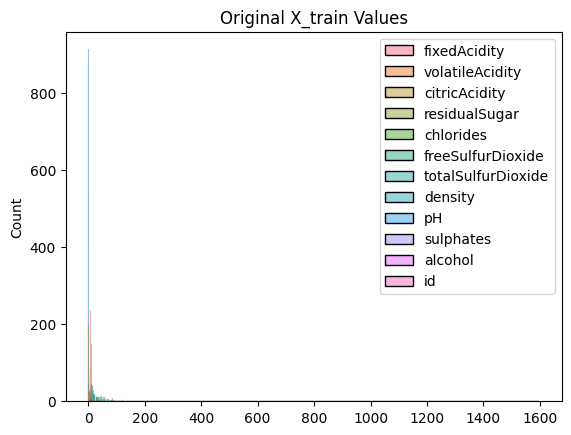

In [ ]:
# Create a title and name it Original X_train Values
plt.title('Original X_train Values')

# Use sns.histplot to visualize the distribution of the X_train values, set the bins to 'auto'
sns.histplot(X_train, bins='auto')

# plt.show()

<Axes: title={'center': 'X_train Values after Mn-Max Scaling'}, ylabel='Count'>

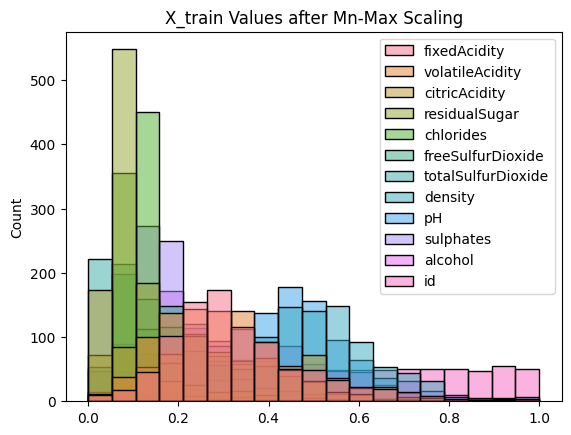

In [ ]:
# Create a title and name it 'X_train Values after Min-Max Scaling'
plt.title('X_train Values after Mn-Max Scaling')

# Use sns.histplot to visualize the distribution of the Xtrain_after_mms, set the bins to np.linspace(0, 1, 20)
sns.histplot(Xtrain_after_mms, bins=np.linspace(0,1,20))

<Axes: title={'center': 'X_train Values after Standardization'}, ylabel='Count'>

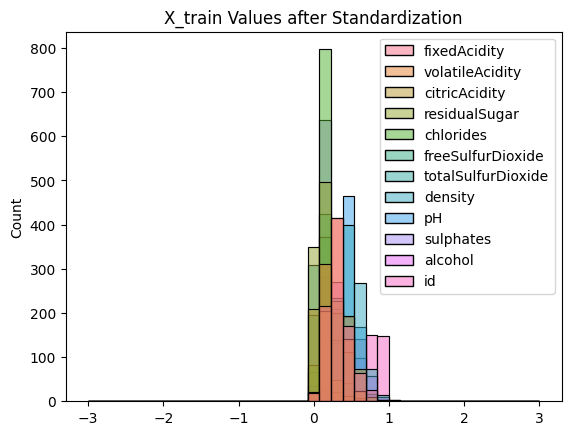

In [49]:
# Create a title and name it 'X_train Values after Standardization'
plt.title('X_train Values after Standardization')

# Use sns.histplot to visualize the distribution of the Xtrain_after_mms, set the bins to np.linspace(-3, 3, 20)
sns.histplot(Xtrain_after_mms, bins=np.linspace(-3, 3, 40))


# heheheh not sure if correct, but hey it's done ;-;
# 7:38pm 20241129